Columns in the dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

First few rows of

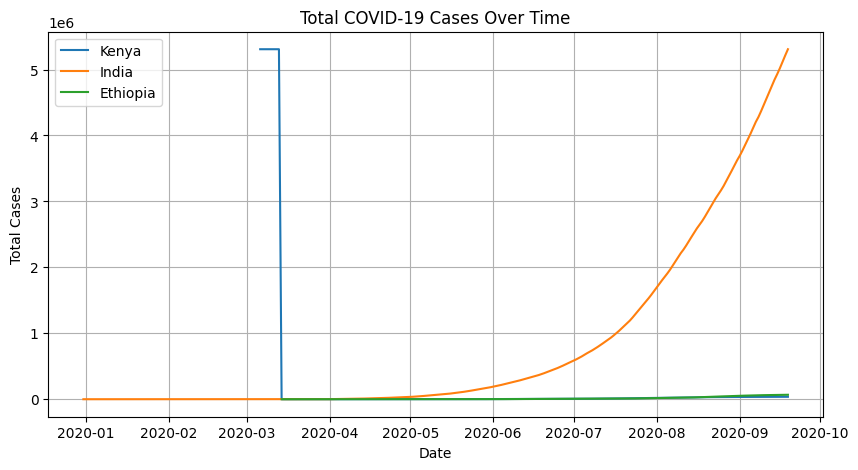


Automated Key Insights:
Kenya has a total of 5,308,014 cases, with 0 vaccinations as of 2020-09-19. The last case recorded was on 2020-03-06.
India has a total of 5,308,014 cases, with 0 vaccinations as of 2020-09-19. The last case recorded was on 2020-09-19.
Ethiopia has a total of 67,515 cases, with 0 vaccinations as of 2020-09-19. The last case recorded was on 2020-09-19.


In [17]:
# COVID-19 Global Data Tracker

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# ===========================
# Step 1: Data Collection
# ===========================
try:
    # Load the dataset from the CSV file
    df = pd.read_csv('owid-covid-data.csv')
except FileNotFoundError:
    print("Error: The file 'owid-covid-data.csv' was not found. Please check the file path.")
    raise

# ===========================
# Step 2: Data Loading & Exploration
# ===========================
print("Columns in the dataset:")
print(df.columns)

# Preview the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values in the dataset
print("\nMissing values in each column:")
print(df.isnull().sum())

# ===========================
# Step 3: Data Cleaning
# ===========================
# Define countries of interest for analysis
countries_of_interest = ['Kenya', 'USA', 'India', 'Ethiopia']

# Filter the dataset for the selected countries
df_filtered = df[df['location'].isin(countries_of_interest)]

# Remove rows with missing dates
df_filtered = df_filtered.dropna(subset=['date'])

# Convert the 'date' column to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Handle missing numeric values by forward-filling
df_filtered = df_filtered.ffill()

# ===========================
# Step 4: Exploratory Data Analysis (EDA)
# ===========================
# Check if the required columns are present
required_columns = ['date', 'location', 'total_cases', 'total_deaths', 'total_vaccinations']

for column in required_columns:
    if column not in df_filtered.columns:
        print(f"Warning: Column '{column}' not found in the filtered dataset.")

# Plot total cases over time for each country
plt.figure(figsize=(10, 5))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    if 'total_cases' in df_filtered.columns and not country_data.empty:
        plt.plot(country_data['date'], 
                 country_data['total_cases'], label=country)

# Only show legend if there are labels
if any(country in countries_of_interest for country in df_filtered['location']):
    plt.title('Total COVID-19 Cases Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.legend(loc='upper left')  # Ensure legend is placed
    plt.grid()
    plt.show()
else:
    print("No data available to plot total cases.")

# Check if total_vaccinations column exists
if 'total_vaccinations' not in df_filtered.columns:
    print("Warning: 'total_vaccinations' column not found in the filtered dataset.")
else:
    # Plot cumulative vaccinations over time for each country
    plt.figure(figsize=(10, 5))
    for country in countries_of_interest:
        country_data = df_filtered[df_filtered['location'] == country]
        if not country_data.empty and not country_data['total_vaccinations'].isnull().all():
            plt.plot(country_data['date'], 
                     country_data['total_vaccinations'], label=country)

    # Only show legend if there are labels
    if any(country in countries_of_interest for country in df_filtered['location']):
        plt.title('Cumulative Vaccinations Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Vaccinations')
        plt.legend(loc='upper left')  # Ensure legend is placed
        plt.grid()
        plt.show()
    else:
        print("No data available to plot vaccinations.")

# ===========================
# Step 6: Optional - Build a Choropleth Map
# ===========================
latest_data = df_filtered[df_filtered['date'] == df_filtered['date'].max()]

try:
    fig = px.choropleth(
        latest_data,
        locations='iso_code',
        color='total_cases',
        hover_name='location',
        title='COVID-19 Cases by Country',
        color_continuous_scale=px.colors.sequential.Plasma
    )
    fig.show()
except KeyError as e:
    print(f"Warning: Column '{e}' not found in the data for choropleth map.")

# ===========================
# Step 7: Automated Insights Generation
# ===========================
def generate_insights(data, countries):
    insights = []
    
    for country in countries:
        country_data = data[data['location'] == country]
        
        if not country_data.empty:
            total_cases = country_data['total_cases'].max()
            total_vaccinations = country_data['total_vaccinations'].max() if 'total_vaccinations' in country_data.columns else 0
            latest_date = country_data['date'].max()
            last_case_date = country_data[country_data['total_cases'] == total_cases]['date'].values[0]
            
            last_case_date_str = pd.to_datetime(last_case_date).date()
            
            insights.append(f"{country} has a total of {total_cases:,.0f} cases, "
                            f"with {total_vaccinations:,.0f} vaccinations as of {latest_date.date()}. "
                            f"The last case recorded was on {last_case_date_str}.")
    
    return insights

# Generate insights
automated_insights = generate_insights(df_filtered, countries_of_interest)

# Print insights
print("\nAutomated Key Insights:")
for insight in automated_insights:
    print(insight)